<center>
<h1>COMP3242/6242: Deep Learning</h1>
<h2>Lab #1: Python and PyTorch Basics</h2>
Semester 1, 2026<br>
</center>


**Due**: 11:55pm on Sunday 1 March, 2026.<br>

Submit solutions as a single Jupyter Notebook via Canvas. Make sure that your name and student ID appears in the section below. You may not work with any other person in completing this laboratory. You must acknowledge any non-course texts or online material used. See the course policy on the use of generative AI tools such as ChatGPT and Claude.

This assignment will be **automatically graded**. Read and follow instructions carefully!

Test code is provided for you to check your work as you progress through the assignment. Feel free to add further tests and output useful for your own debugging. Note that this code will not be run when we automatically grade your submission. We will exercise your code beyond what is provided here. Do not add any Jupyter notebook magic commands (i.e., those starting with `%` or `%%`). These may cause the autograding script to fail.

Complete all **TODOs** and delete any placeholder (`pass` and `...`).

**Run all code blocks from start to end (`Restart & Run All`) and then save your Jupyter Notebook before submitting your assignment to ensure everything works as expected.**

In [1]:
# TODO: Replace with your name and university ID
student_name = "Weiyi Jiang"
student_id = "u8191809"

In [2]:
# TODO: The ANU lab machines will have python and the necessary packages already installed. If you're working
# on your own machine you will need to install python with Jupyter notebook, OpenCV and PyTorch:
#  - Documentation for the OpenCV computer vision library is here: https://opencv.org/. You should be able
#    to install the library on your computer using `pip install opencv-python` or if you have conda
#    `conda install conda-forge::opencv`.
#  - Documentation for the PyTorch deep learning library is here: https://pytorch.org/. Follow the
#    installation instructions (for the stable release, v2.9.1 at time of writing), being sure to install
#    both `pytorch` and `torchvision`. You will not need access to a GPU for this course but having one
#    may increase computation speed.
#  Browse through the user documentation and tutorials for these libraries.

import sys
import getpass

def is_notebook():
    return 'ipykernel' in sys.modules

import numpy as np
import cv2
import torch
import torchvision
import matplotlib.pyplot as plt

print("User: {} ({}, {})".format(getpass.getuser(), student_name, student_id))
print("Python Version: {}".format(sys.version))
print("OpenCV version {}".format(cv2.__version__))
print("PyTorch Version: {}".format(torch.__version__))

User: cichlidfish (Weiyi Jiang, u8191809)
Python Version: 3.9.6 (default, Dec  2 2025, 07:27:58) 
[Clang 17.0.0 (clang-1700.6.3.2)]
OpenCV version 4.13.0
PyTorch Version: 2.8.0


In [3]:
device = torch.device("cpu")
random_seed = 3242
torch.manual_seed(random_seed)

In [4]:
# --- TASK 1 --------------------------------------------------------------------------------------
# This task ensures that you are comfortable creating and manipulating PyTorch data structures.

def create_batched_matrices(B=2):
    """Returns a B-by-2-by-3 tensor of matrices."""

    # TODO: Create and return a PyTorch tensor representing a batch of 2-by-3 matrices. There
    #  should be B matrices in the batch. The b-th matrix in the batch should be of the form,
    #    b-1, -b,  b+1
    #    -b-1,  b, -b+1
    #  where indexing is 0-based. For example, the first matrix in the batch should be
    #    -1,  0,  1
    #    -1,  0,  1
    #  As a challenge, try to avoid using for loops.
    #  The returned tensor `data` should be of shape (B, 2, 3), of type `float32`, and of device `cpu`.

    b = torch.arange(B,dtype=torch.float32).view(B,1,1)
    # whats the rule of view(x,y,z)

    signs = torch.tensor([[1,-1,1],[-1,1,-1]] , dtype=torch.float32)
    const = torch.tensor([[-1,0,1],[-1,0,1]] , dtype=torch.float32)

    data = (b*signs + const)

    return data


def reshape_tensor(flat, shape):
    """Returns a flattened tensor into a given shape."""

    # TODO: Reshape `flat` into a tensor of size `shape` and return it. You can assume that `flat` is a 1D tensor.

    tensor = flat.reshape(shape)

    return tensor

In [5]:
# Some unit tests for Task 1.

if is_notebook():
    print(create_batched_matrices())
    print(create_batched_matrices(5))
    
    A = torch.tensor ([[8 , 5, 1], [3, 6, 2]]).flatten()
    print(reshape_tensor(A, [2, 3]))
    print(reshape_tensor(A, [3, 2]))


tensor([[[-1.,  0.,  1.],
         [-1.,  0.,  1.]],

        [[ 0., -1.,  2.],
         [-2.,  1.,  0.]]])
tensor([[[-1.,  0.,  1.],
         [-1.,  0.,  1.]],

        [[ 0., -1.,  2.],
         [-2.,  1.,  0.]],

        [[ 1., -2.,  3.],
         [-3.,  2., -1.]],

        [[ 2., -3.,  4.],
         [-4.,  3., -2.]],

        [[ 3., -4.,  5.],
         [-5.,  4., -3.]]])
tensor([[8, 5, 1],
        [3, 6, 2]])
tensor([[8, 5],
        [1, 3],
        [6, 2]])


In [6]:
# --- TASK 2 --------------------------------------------------------------------------------------
# Basic linear algebra in PyTorch.

def batched_linear_transform(x):
    """Performs a linear transformation on a batch of 3-dimensional vectors, i.e., shape (B, 3)."""

    # TODO: Write code to perform the linear transform yi = A xi + b for each 3-dimensional vector, xi,
    #  in the batch, where A is a 2-by-3 dimensional matrix with entries,
    #    0.1, 3.5, -2.5
    #   -0.7, 0.5, -1.2
    # and b is a 2-vector with entries,
    #   0.6
    #  -1.9
    # `x` is of shape (B, 3), of type `float32`, and of device `cpu`.
    # The returned tensor `y` should be of shape (B, 2), of type `float32`, and of device `cpu`.

    A = torch.tensor([
        [0.1,3.5,-2.5],
        [-0.7,0.5,-1.2]
    ],dtype = torch.float32)

    b = torch.tensor([
        0.6,-1.9
    ],dtype = torch.float32)

    y = x @ A.T + b

    return y

In [7]:
# Some unit tests for Task 2.

if is_notebook():
    x = torch.zeros((1, 3), dtype=torch.float32)
    print(batched_linear_transform(x))
    
    x = torch.tensor([[1, 0, 0]], dtype=torch.float32)
    print(batched_linear_transform(x))

tensor([[ 0.6000, -1.9000]])
tensor([[ 0.7000, -2.6000]])


In [8]:
# --- TASK 3 --------------------------------------------------------------------------------------
# This task covers the basics of working with text files.

def load_data(filename, codebook):
    """Loads data from a text file containing one word per line and converts them into tokens based 
    on the `codebook` dictionary. Returns a Python array or tokens. Words not appearing in the codebook
    are skipped."""

    # TODO: Open the text file `filename` and read each line one at a time. Lookup each line in the
    # `codebook` and append the corresponding codeword to `tokens`. Comparison should be case insensitive.
    # If the line does not exist in the codebook then it should be skipped. The `codebook` will be provided
    # as a Python dictionary with keys in lowercase. You can check membership with `if <key> in codebook`.
    # Don't forget to trim whitespace from the beginning and end of any lines read from file.

    tokens = []

    with open(filename,'r') as f:
        for line in f:
            word = line.strip().lower()

            if word in codebook:
                tokens.append(codebook[word])

    return tokens


In [9]:
# Some unit tests for Task 3.

if is_notebook():
    codebook = {
        "dog": 1,
        "cat": 2,
        "duck": 5
    }
    
    tokens = load_data('lab01testdata.txt', codebook)
    print(tokens)

[1, 2, 5, 1, 1, 1]


In [10]:
# --- TASK 4 --------------------------------------------------------------------------------------
# This task covers the basics of working with images.

def load_image_as_color(filename):
    """Loads an image in RGB colour format."""

    # TODO: Use OpenCV to load and return an image from the filename provided. Make sure to convert
    # the image to RGB. Hint: use cv2.cvtColor.
    # The returned numpy array `img` should be of shape (H, W, 3), of type `uint8`.

    img_bgr = cv2.imread(filename)

    img = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    
    return img


def load_image_as_grayscale(filename):
    """Loads an image in grayscale format."""

    # TODO: Use OpenCV to load an image from the filename provided. Convert the image to grayscale
    #  and return it.
    # The returned numpy array `img` should be of shape (H, W), of type `uint8`.

    img_bgr = cv2.imread(filename)

    img = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2GRAY)
    
    return img


def crop_image(img, rect):
    """Crop a region out of an image."""

    # TODO: Extract a rectangular crop from an image. The crop is specified as (x, y, w, h) where
    #  (x, y) is the top-left pixel using 0-based indexing and (w, h) is the width and height of the
    #  rectangle. You can assume that the rectangle will be fully inside the image. Make sure that
    #  your code works for both colour and grayscale images. Colour images will be provided in the
    #  OpenCV format, i.e., with shape (H, W, 3).
    # `img` will be a numpy array of shape (H, W, 3) or (H, W), of type `uint8`.
    # `rect` will be a tuple of four ints (x, y, w, h)
    # The returned numpy array `crop` should be of shape (h, w, 3) or (h, w), of type `uint8`.

    x,y,w,h = rect

    crop = img[y:y+h,x:x+w]
    
    return crop


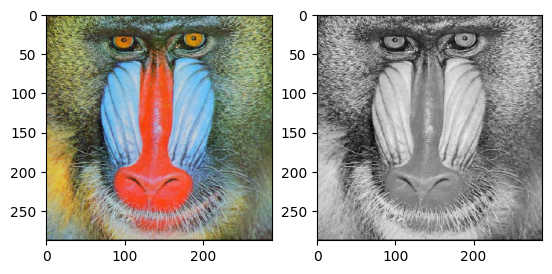

(288, 288, 3)


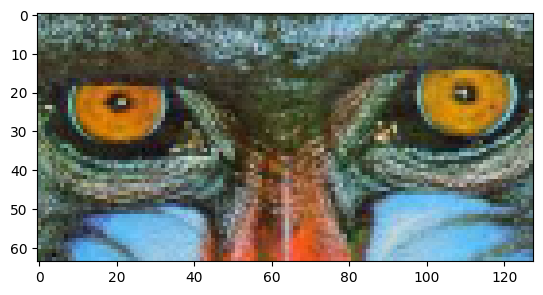

In [11]:
# Some unit tests for Task 4.

if is_notebook():
    filename = 'mandrill.png'
    img1 = load_image_as_color(filename)
    img2 = load_image_as_grayscale(filename)
    
    plt.figure()
    plt.subplot(1, 2, 1); plt.imshow(img1)
    plt.subplot(1, 2, 2); plt.imshow(img2, cmap='gray')
    plt.show()
    
    print(img1.shape)
    crop = crop_image(img1, [78, 10, 128, 64])
    
    plt.figure()
    plt.imshow(crop)
    plt.show()